# Complete classification Example using HR data - Churn Prediction

__The Machine learning workflow__:
Remember, as data scientists we want a consistent process to getting great results. That’s where the machine learning workflow comes in.
There are five core steps:
-__Exploratory Analysis__ – First, “get to know” the data. This step should be quick, efficient, and decisive.
-__Data Cleaning__ – Then, clean your data to avoid many common pitfalls. Better data beats fancier algorithms.
-__Feature Engineering__ – Next, help your algorithms “focus” on what’s important by creating new features.
-__Algorithm Selection__ – Choose the best, most appropriate algorithms without wasting your time.
-__Model Training__ – Finally, train your models. This step is pretty formulaic once you’ve done the first four.

## Exploratory Analysis

Why: - Get to know the dataset
Time: - Should be quick, efficient and decisive
Questions to answer: - How many observations do I have? - How many features? - What are the data types of my features? Are they numeric? Categorical? - Do I have a target variable? - Correlations?

In [108]:
#Loading packages
import pandas as pd

In [109]:
#Import data
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\HR_comma_sep.csv", skipinitialspace=True)
print(df.head())
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])

#Noticed white space in col Departments, change it here
df.columns = df.columns.str.replace(' ', '')

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape: (14999, 10)
-----------------
satisfaction_level --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
last_evaluation --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
number_project --> Type:cat | Nas: 0(0%) | Categories: 6
average_montly_hours --> Type:num | Nas: 0(0%) | Min-Max: (96)-(310)
time_spend_company --> Type:cat | Nas: 0(0%) | Categories: 8
Work_accident --> Type:cat | Nas: 0(0%) | Categories: 2
left --> Type:cat | Nas: 0(0%) | Categories: 2
promotion_last_5years --> Type:cat | Nas: 0(0%) | Categories: 2
Departments --> Type:cat | Nas: 0(0%) | Categories: 10
salary --> Type:cat | Nas: 0(0%) | Categories: 3


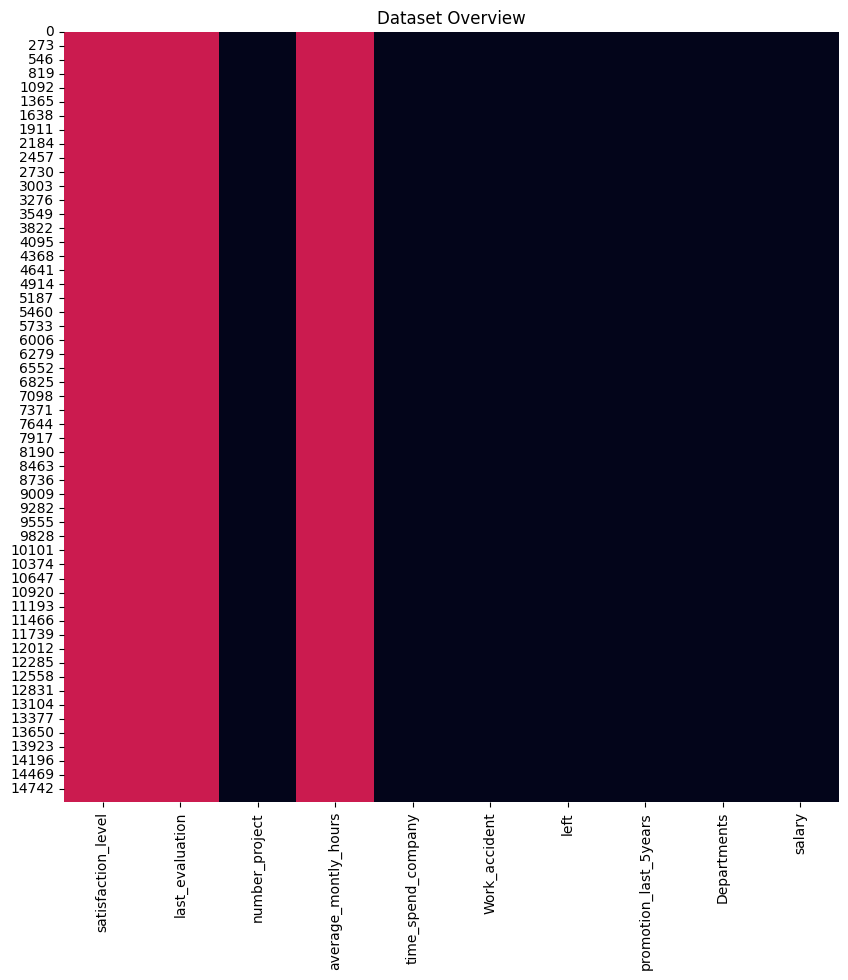

 Categerocial   Numerical/DateTime   NaN 


In [110]:
#Using function to find nans and num and catergorical variables in df
%load_ext autoreload
from functions import dtf_overview
%autoreload 2
dtf_overview(df, figsize=(10,10))

array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>,
        <AxesSubplot: title={'center': 'number_project'}>],
       [<AxesSubplot: title={'center': 'average_montly_hours'}>,
        <AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'Work_accident'}>],
       [<AxesSubplot: title={'center': 'left'}>,
        <AxesSubplot: title={'center': 'promotion_last_5years'}>,
        <AxesSubplot: >]], dtype=object)

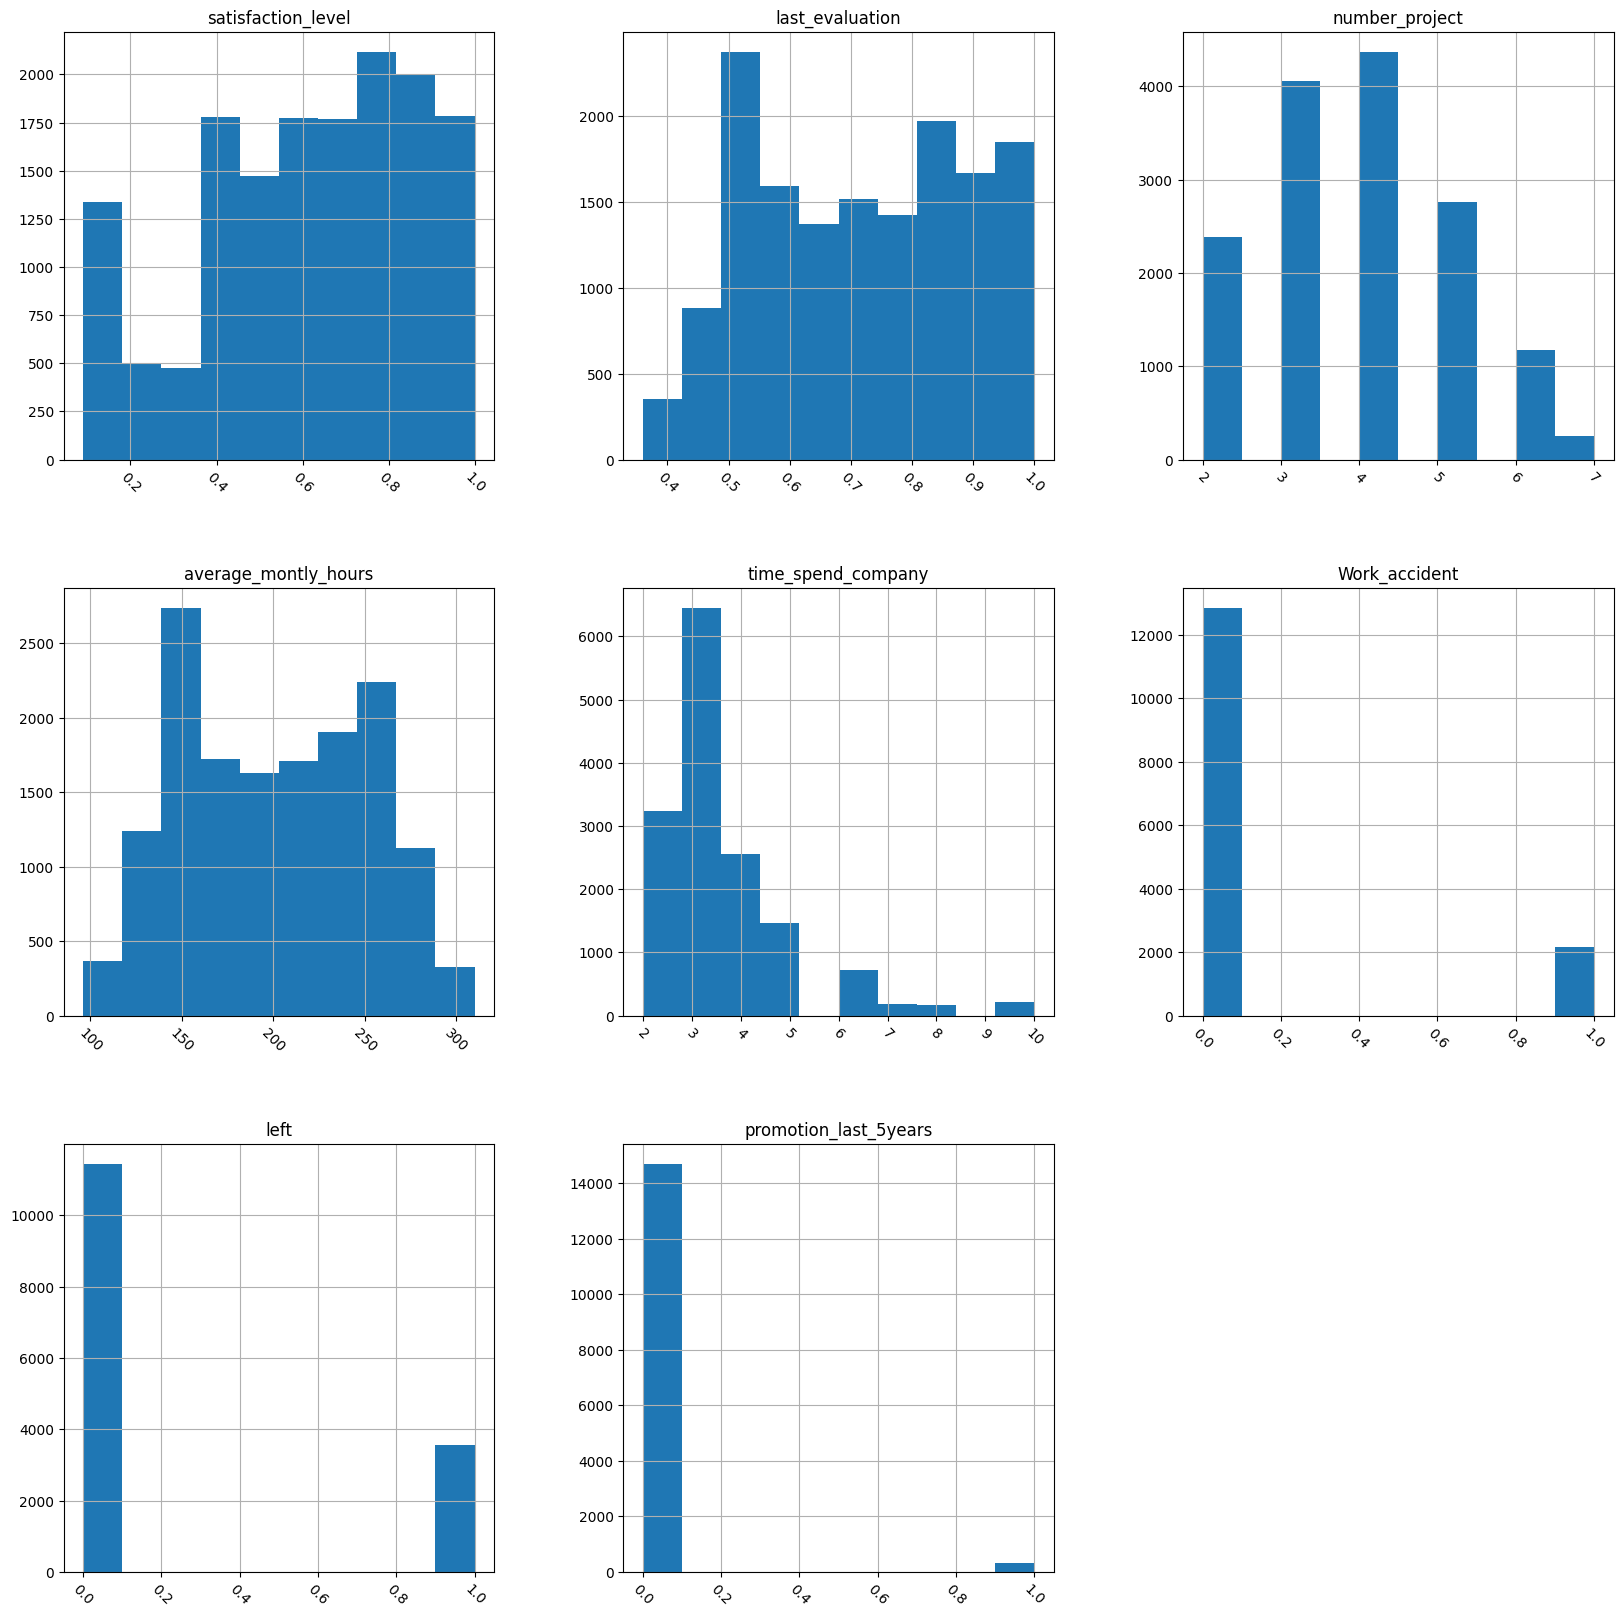

In [111]:
#Make histogram
df.hist(figsize=(20,20), xrot=-45)

NB! Here are a few things to look out for in a histogram:
- Distributions that are unexpected
- Potential outliers that don’t make sense
- Features that should be binary (i.e. “wannabe indicator variables”)
- Boundaries that don’t make sense
- Potential measurement errors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


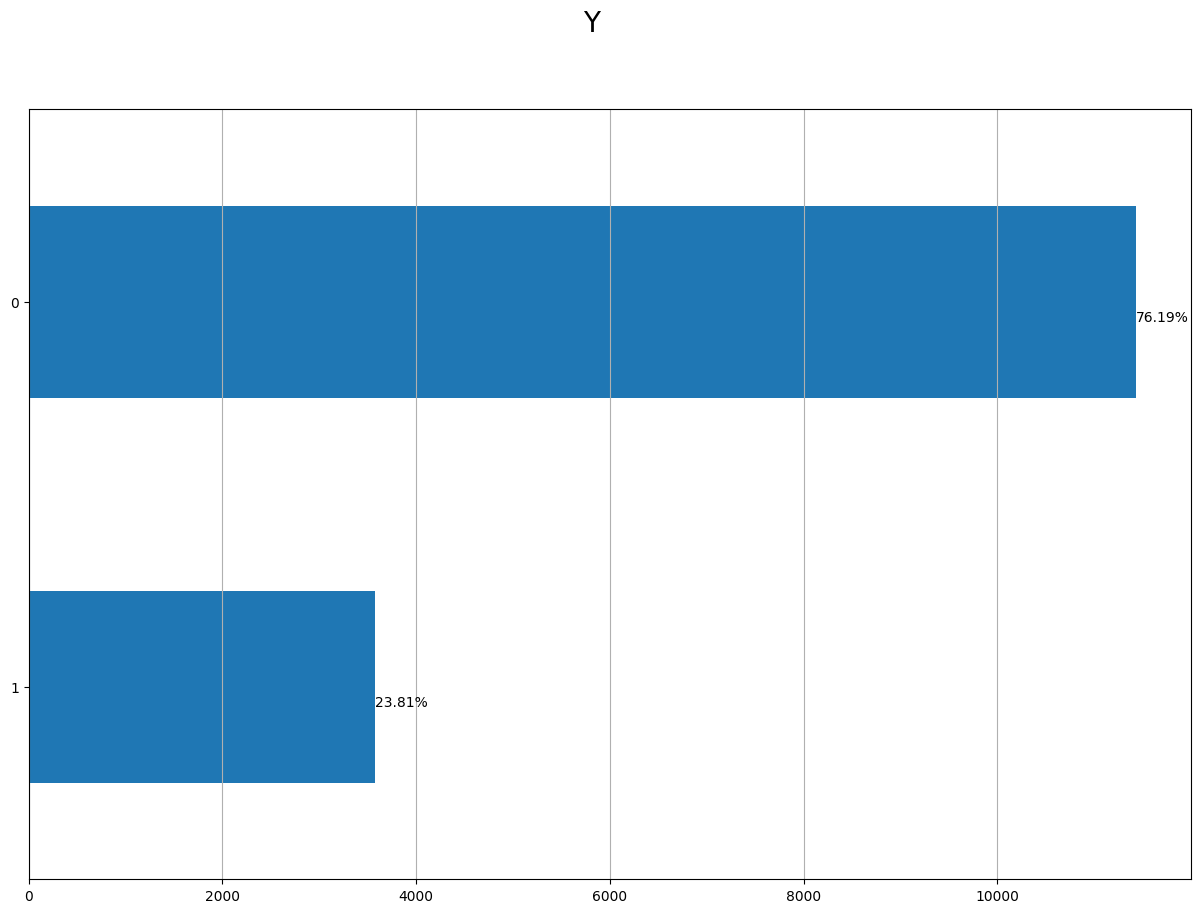

In [112]:
#Get the distribution of left

#Rename "left" variable to Y
df = df.rename(columns={"left":"Y"})

#Plot Y
%load_ext autoreload
from functions import freqdist_plot
%autoreload 2
freqdist_plot(dtf = df, x = "Y", box_logscale=True, figsize=(15,10), quantile_breaks=(0,10))

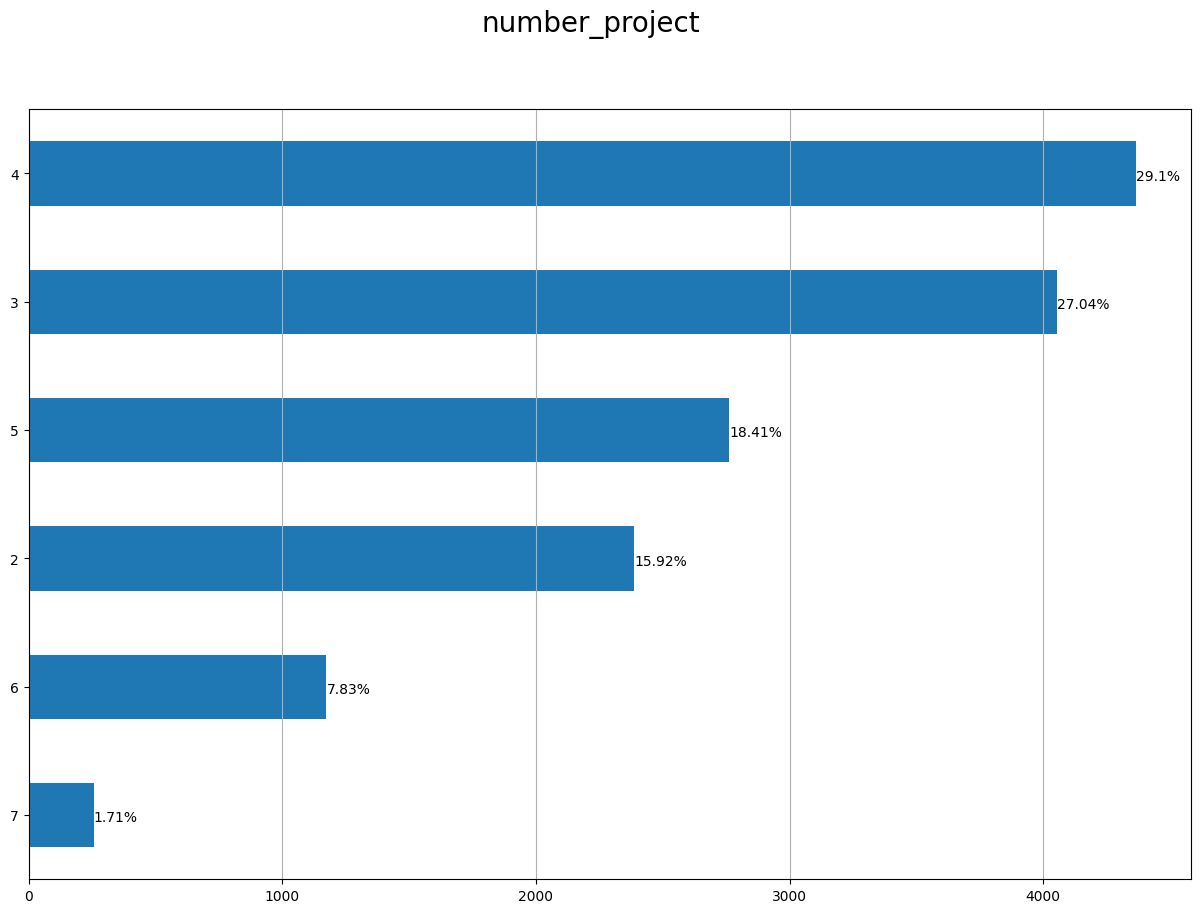

In [113]:
#Plotting categorical variables
freqdist_plot(df, "number_project", figsize=(15,10))

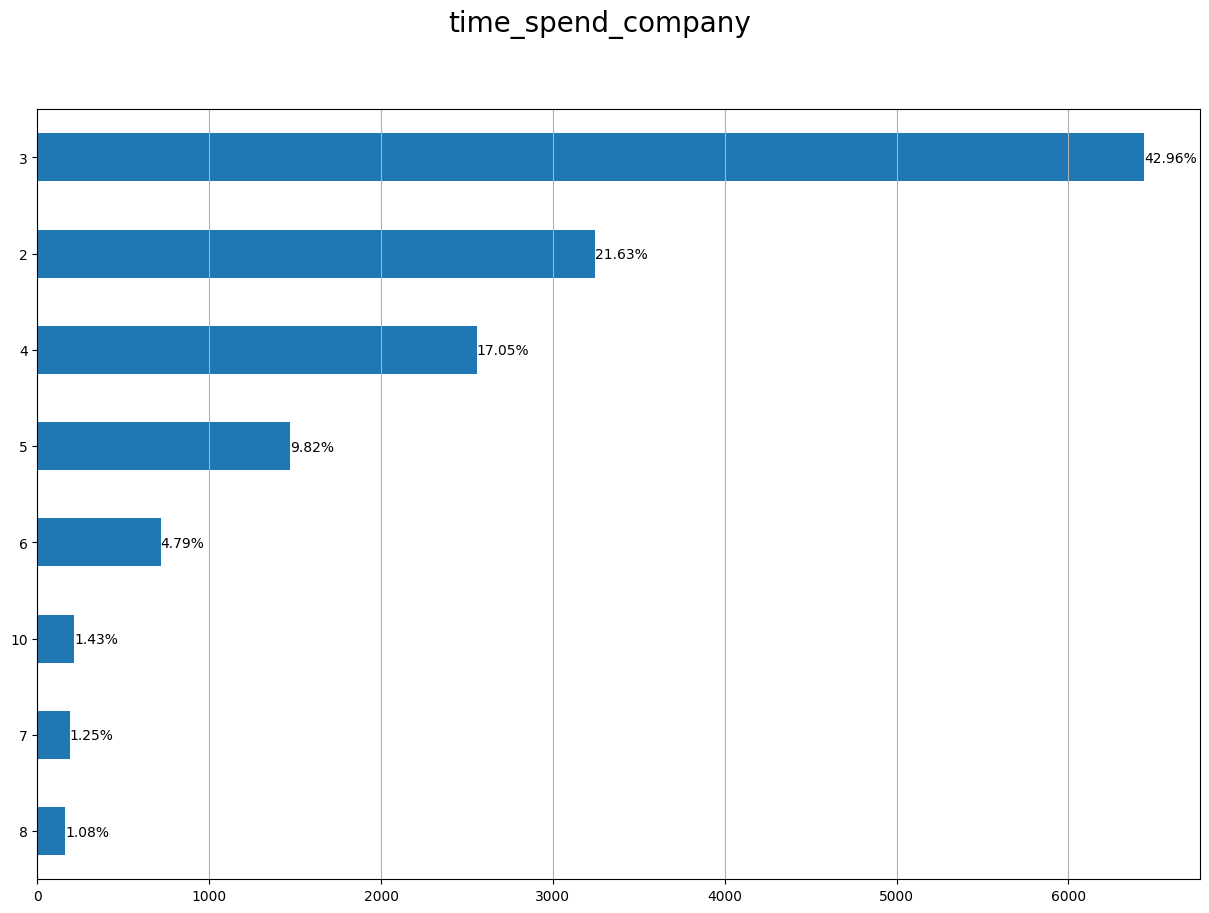

In [114]:
#Plotting categorical variables
freqdist_plot(df, "time_spend_company", figsize=(15,10))

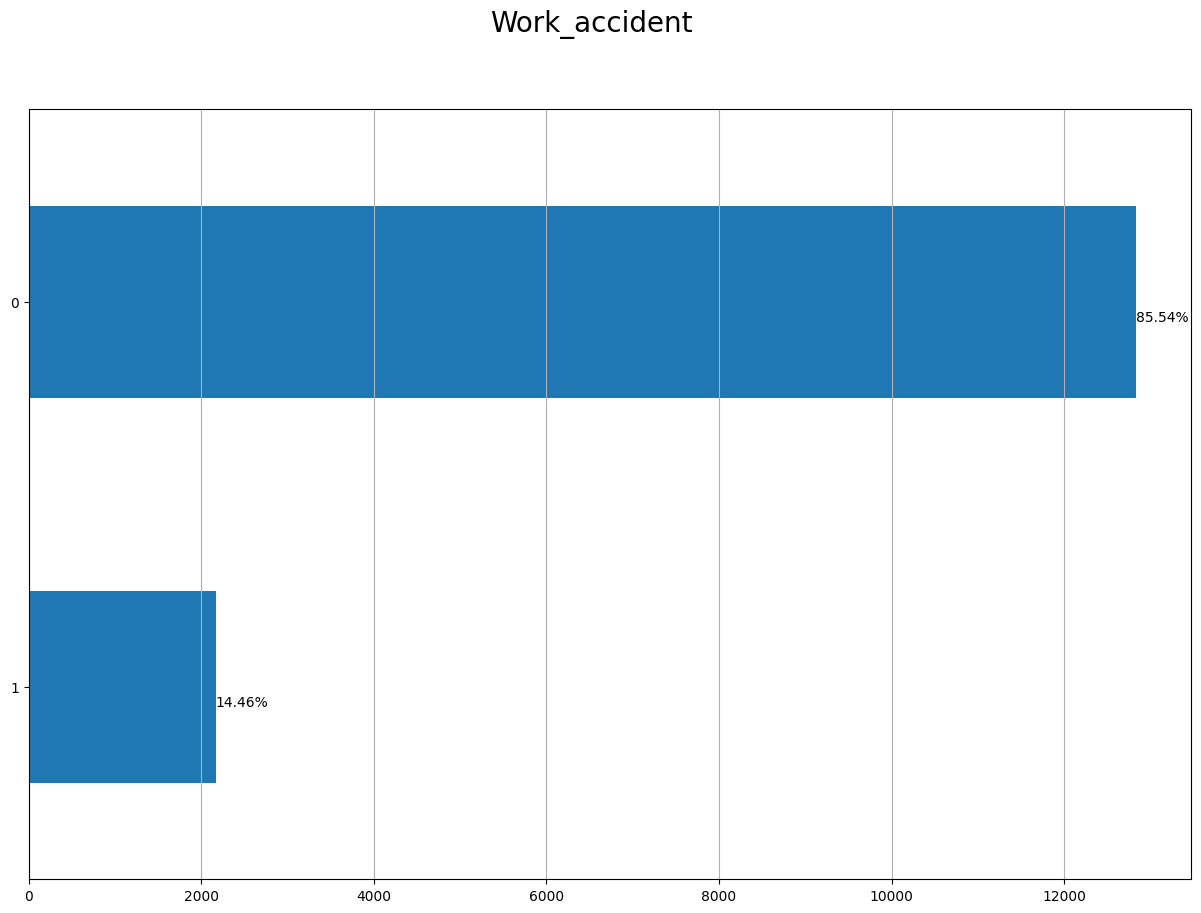

In [115]:
#Plotting categorical variables
freqdist_plot(df, "Work_accident", figsize=(15,10))

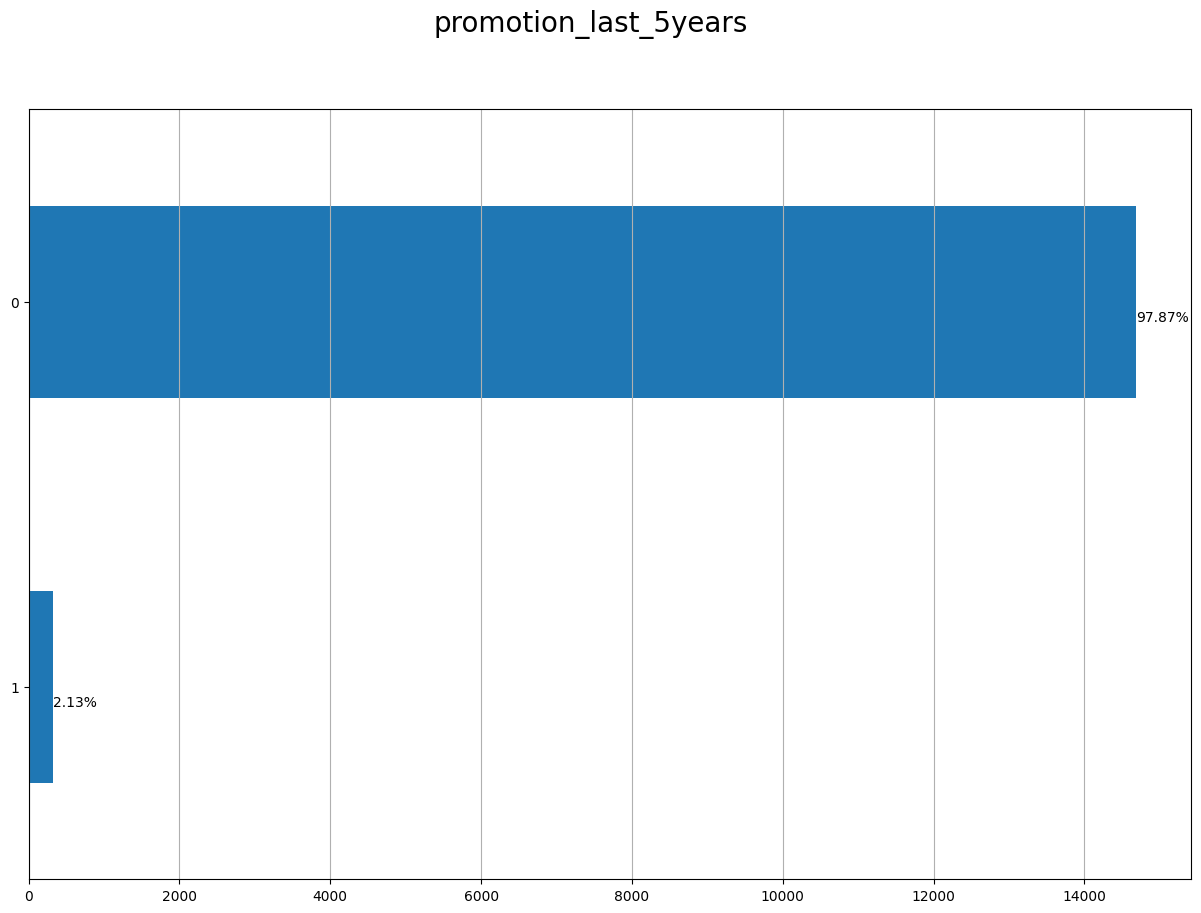

In [116]:
#Plotting categorical variables
freqdist_plot(df, "promotion_last_5years", figsize=(15,10))

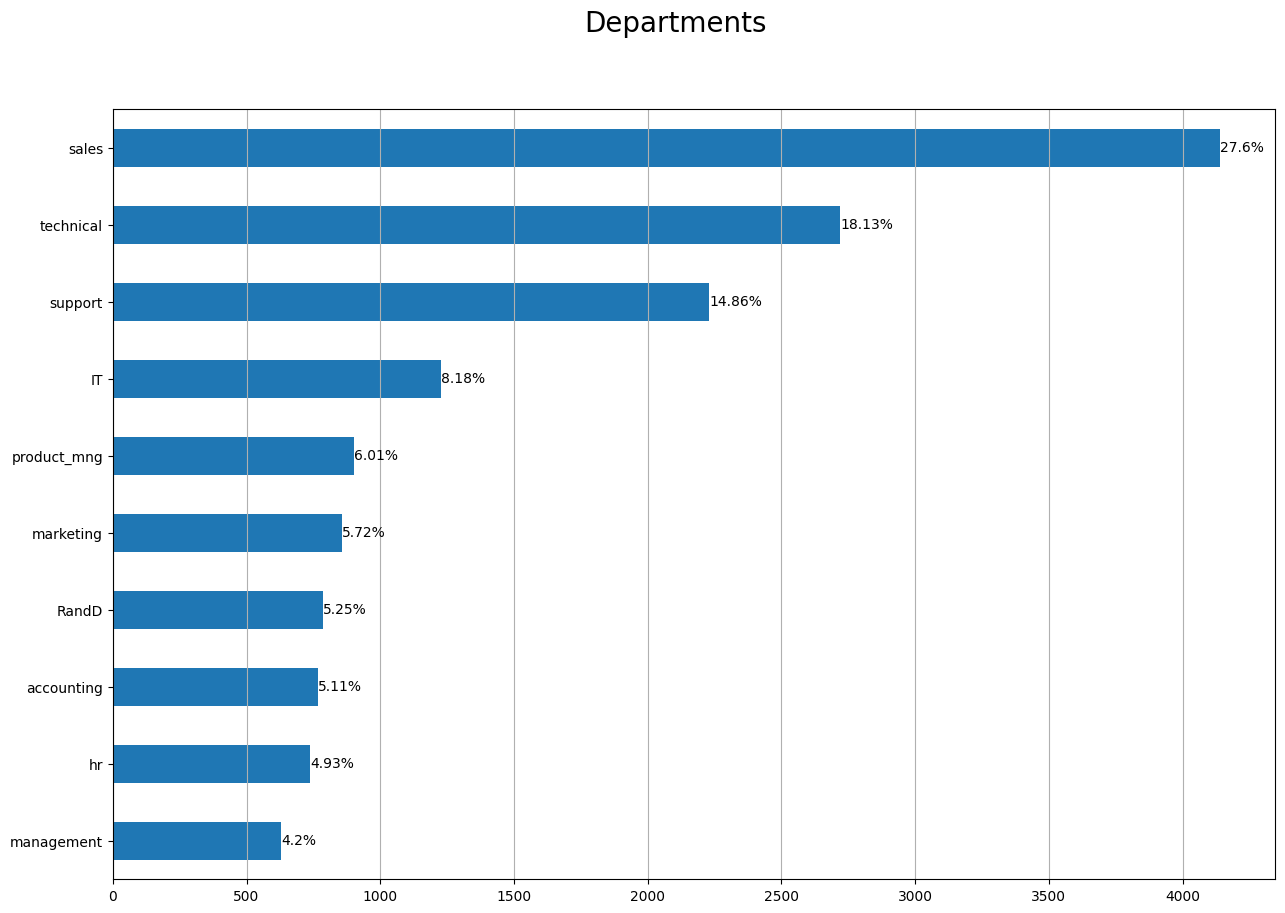

In [117]:
#Plotting categorical variables
freqdist_plot(df, "Departments", figsize=(15,10))

<AxesSubplot: >

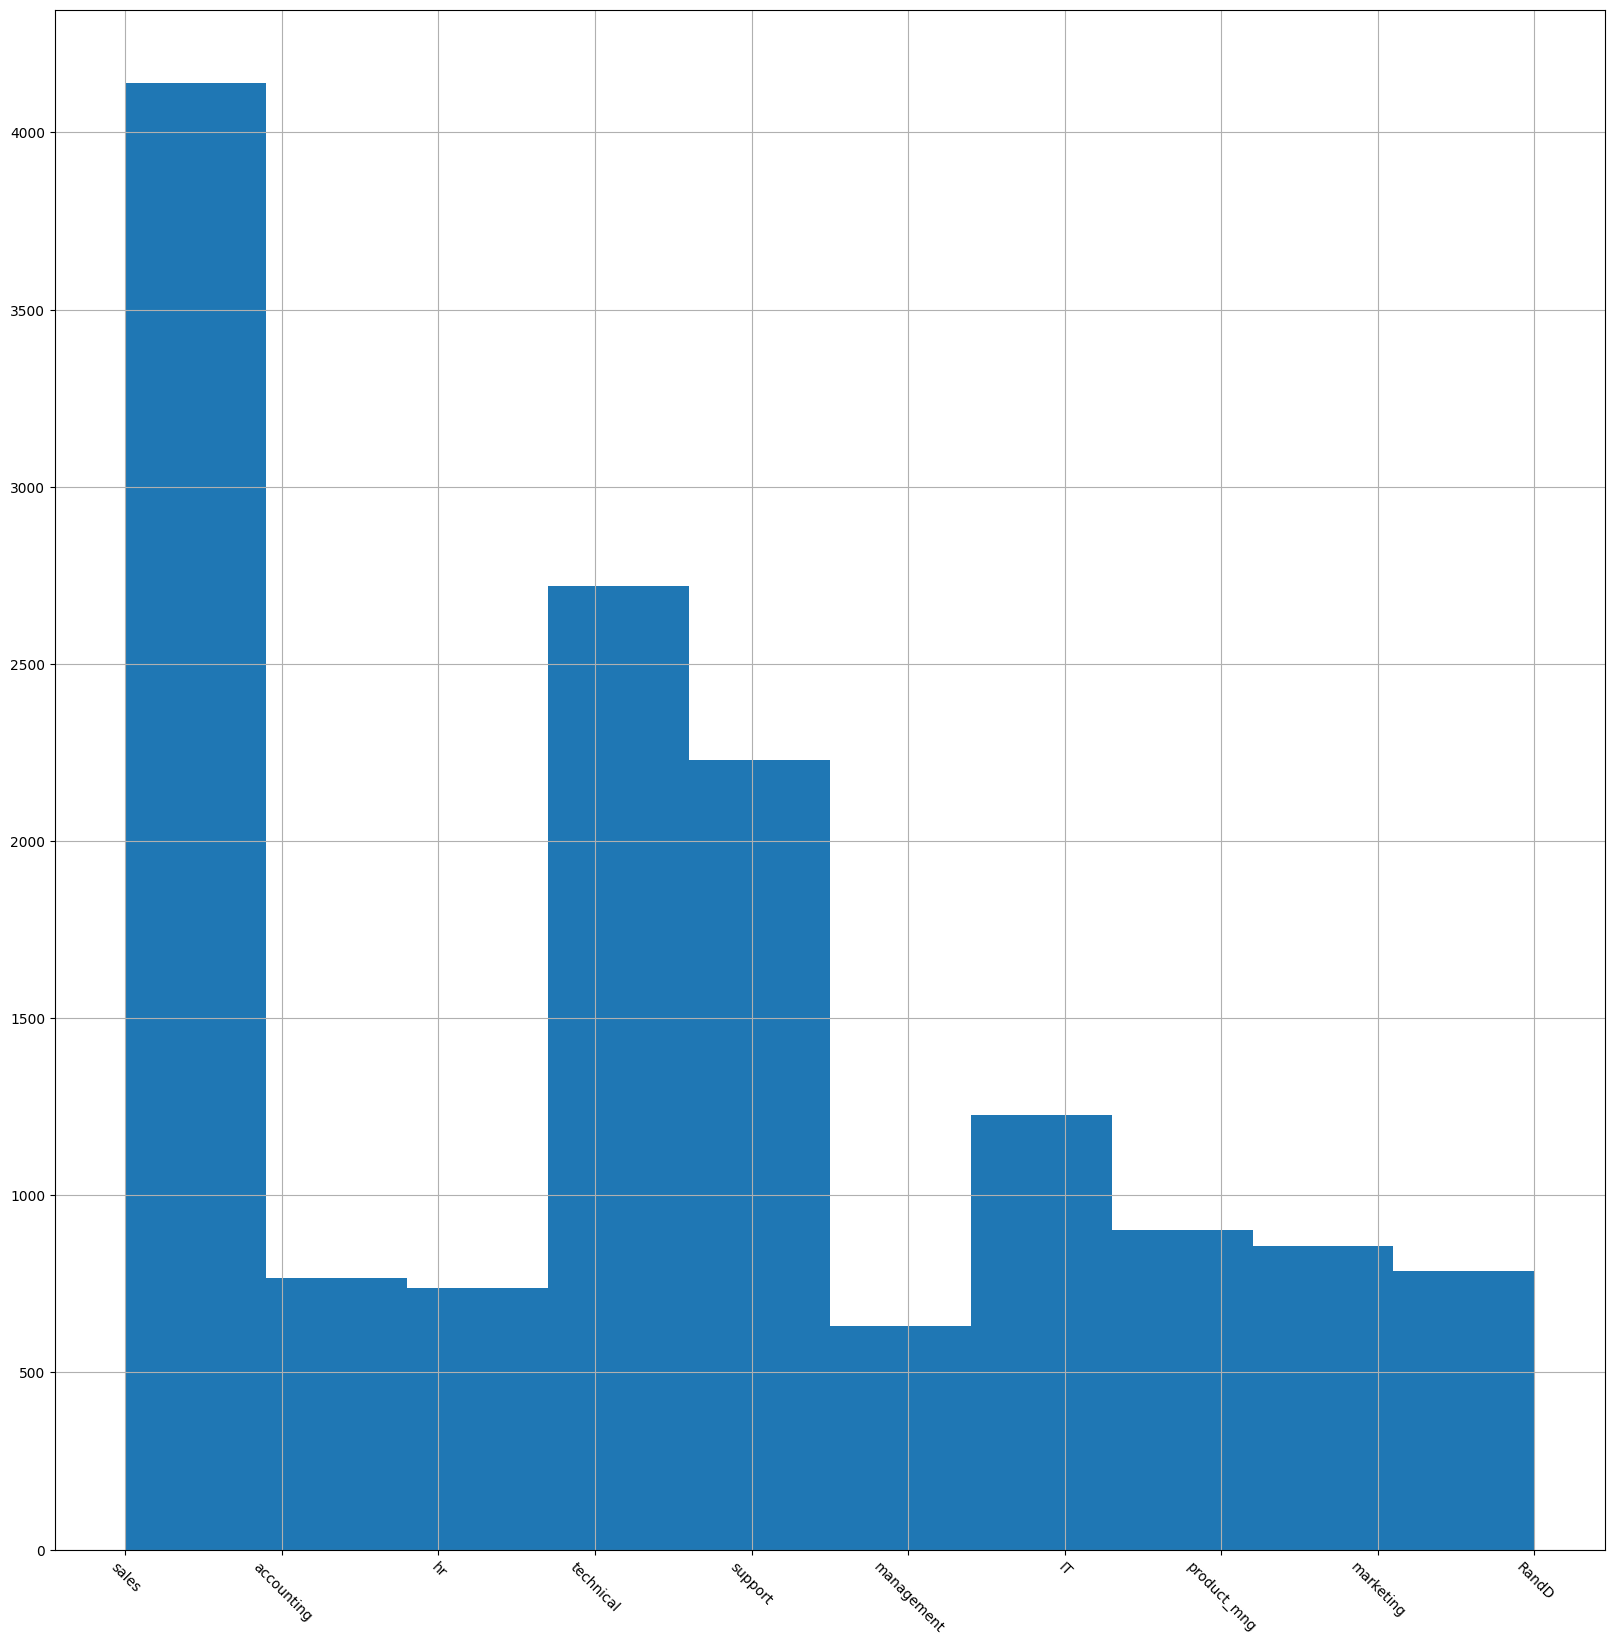

In [118]:
#Create hist of Dep
df["Departments"].hist(figsize=(20,20), xrot=-45)

NB! Here are some things to look out for when looking at categorical variabels:
       - Sparse classes. Can potentially cause the model to overfit. Should be combined if possible in Feature Engineering process.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- WARNING: Factorizing 10 labels of Departments ---
--- WARNING: Factorizing 3 labels of salary ---


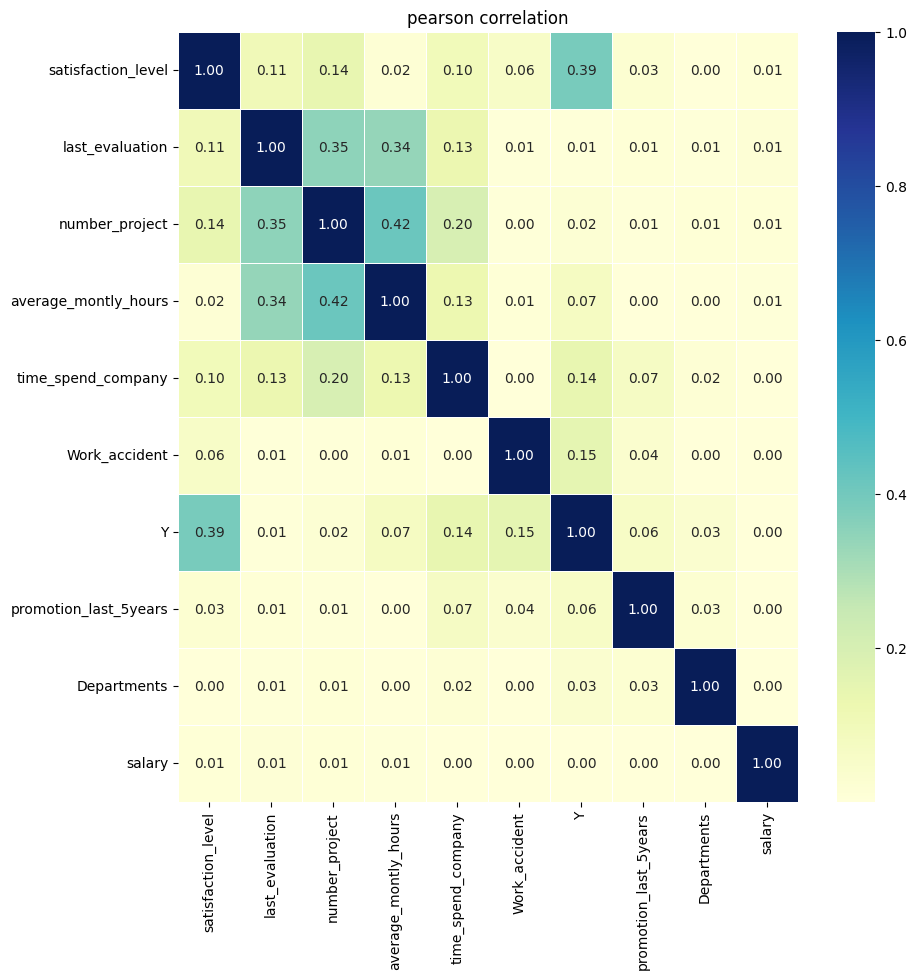

In [119]:
#Finding correlation with num var and Y
%load_ext autoreload
from functions import corr_matrix
%autoreload 2
corr = corr_matrix(df, method="pearson", negative=False, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


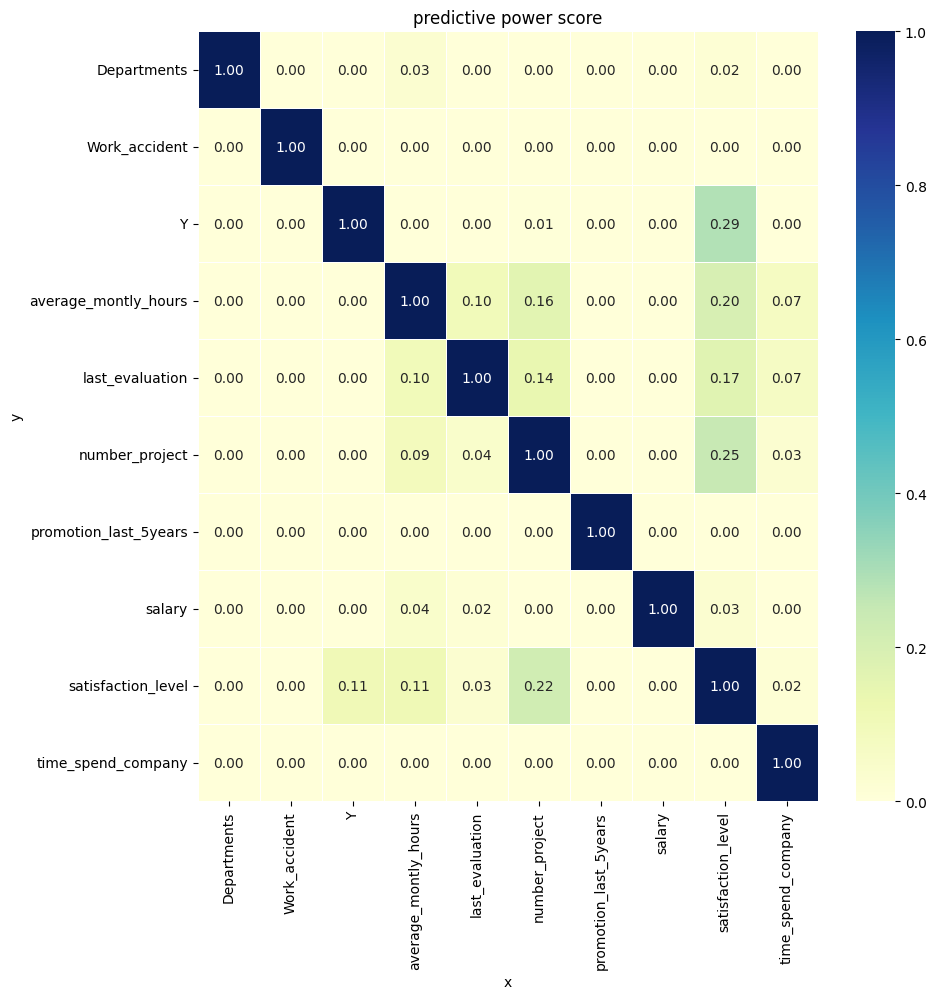

In [120]:
#Finding predictiv score between num and Y
%load_ext autoreload
from functions import pps_matrix
%autoreload 2
pps = pps_matrix(dtf = df, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\code\functions.py:191: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=figsize)
C:\Users\jg\code\templat_reg_and_class\code\functions.py:191: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f

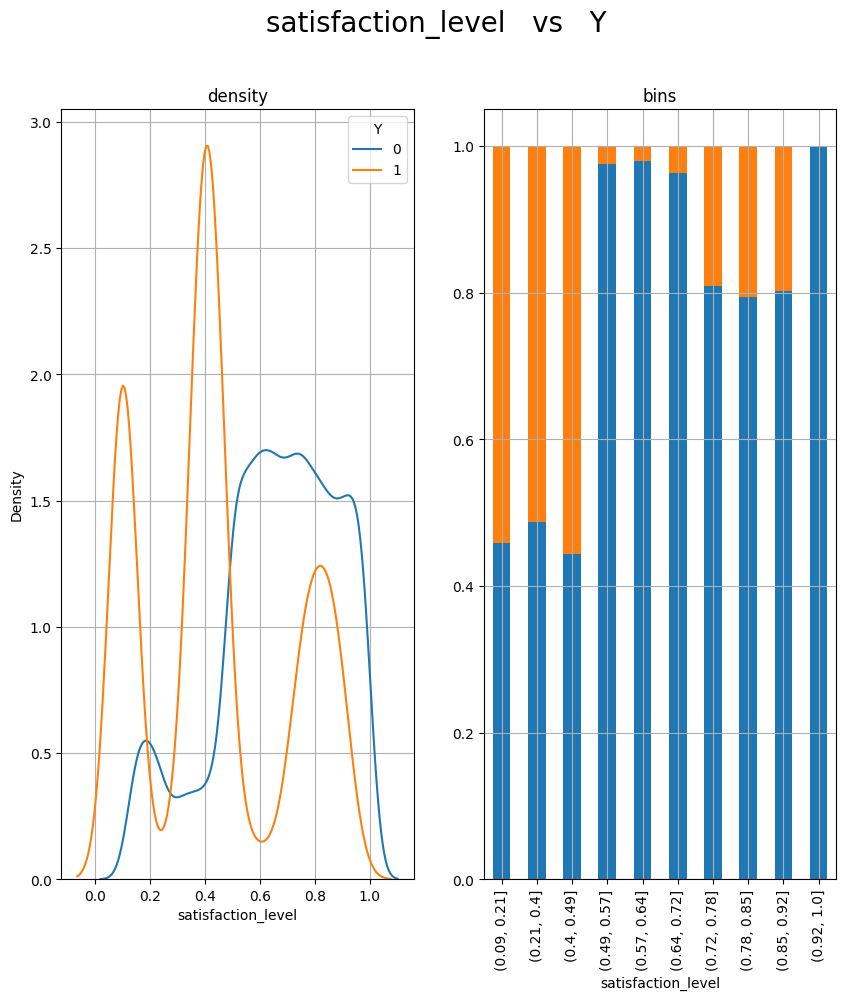

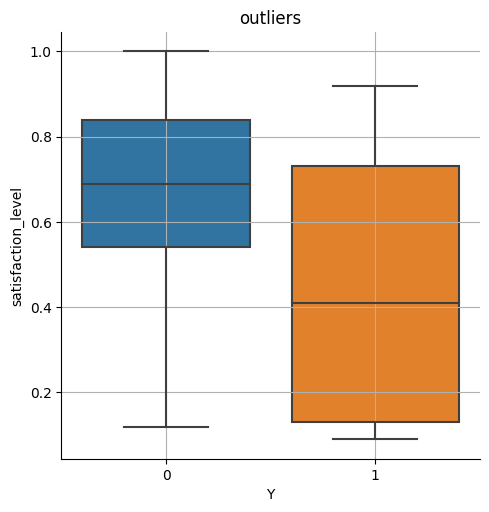

In [121]:
#Analysing highest corr with Y - satisfaction_level
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="satisfaction_level", y="Y", figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0, 1]


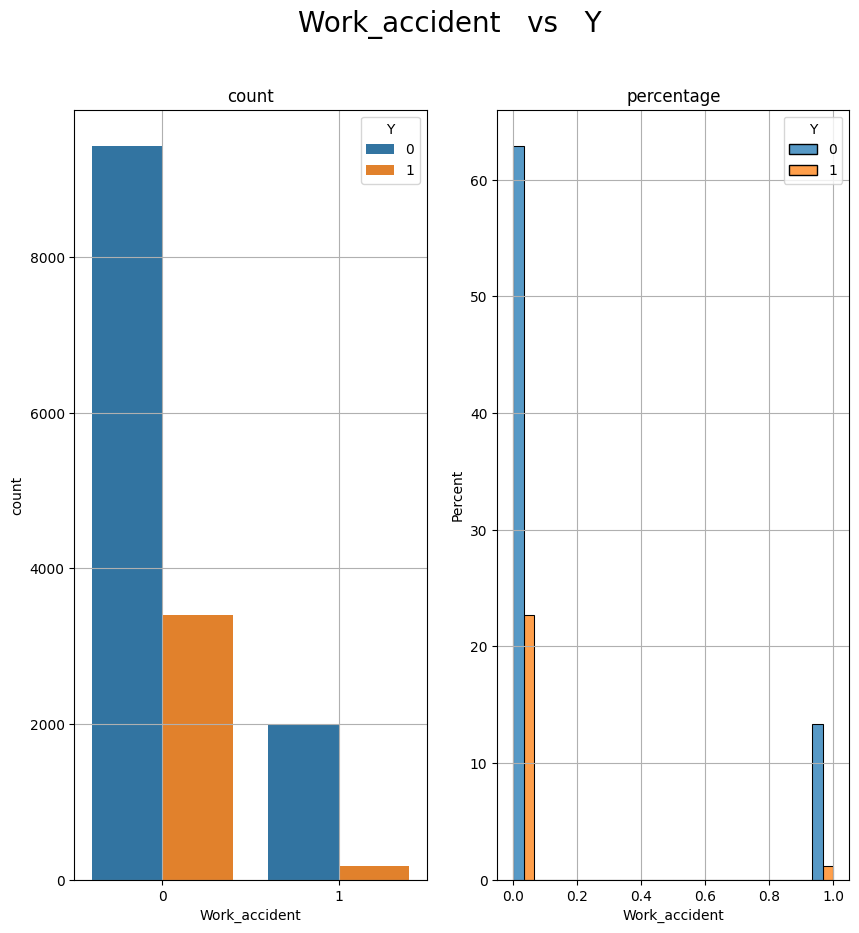

In [107]:
#Analysing highest corr with Y - satisfaction_level
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="Work_accident", y="Y", figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[2, 3, 4, 5, 6, 7, 8, 10]


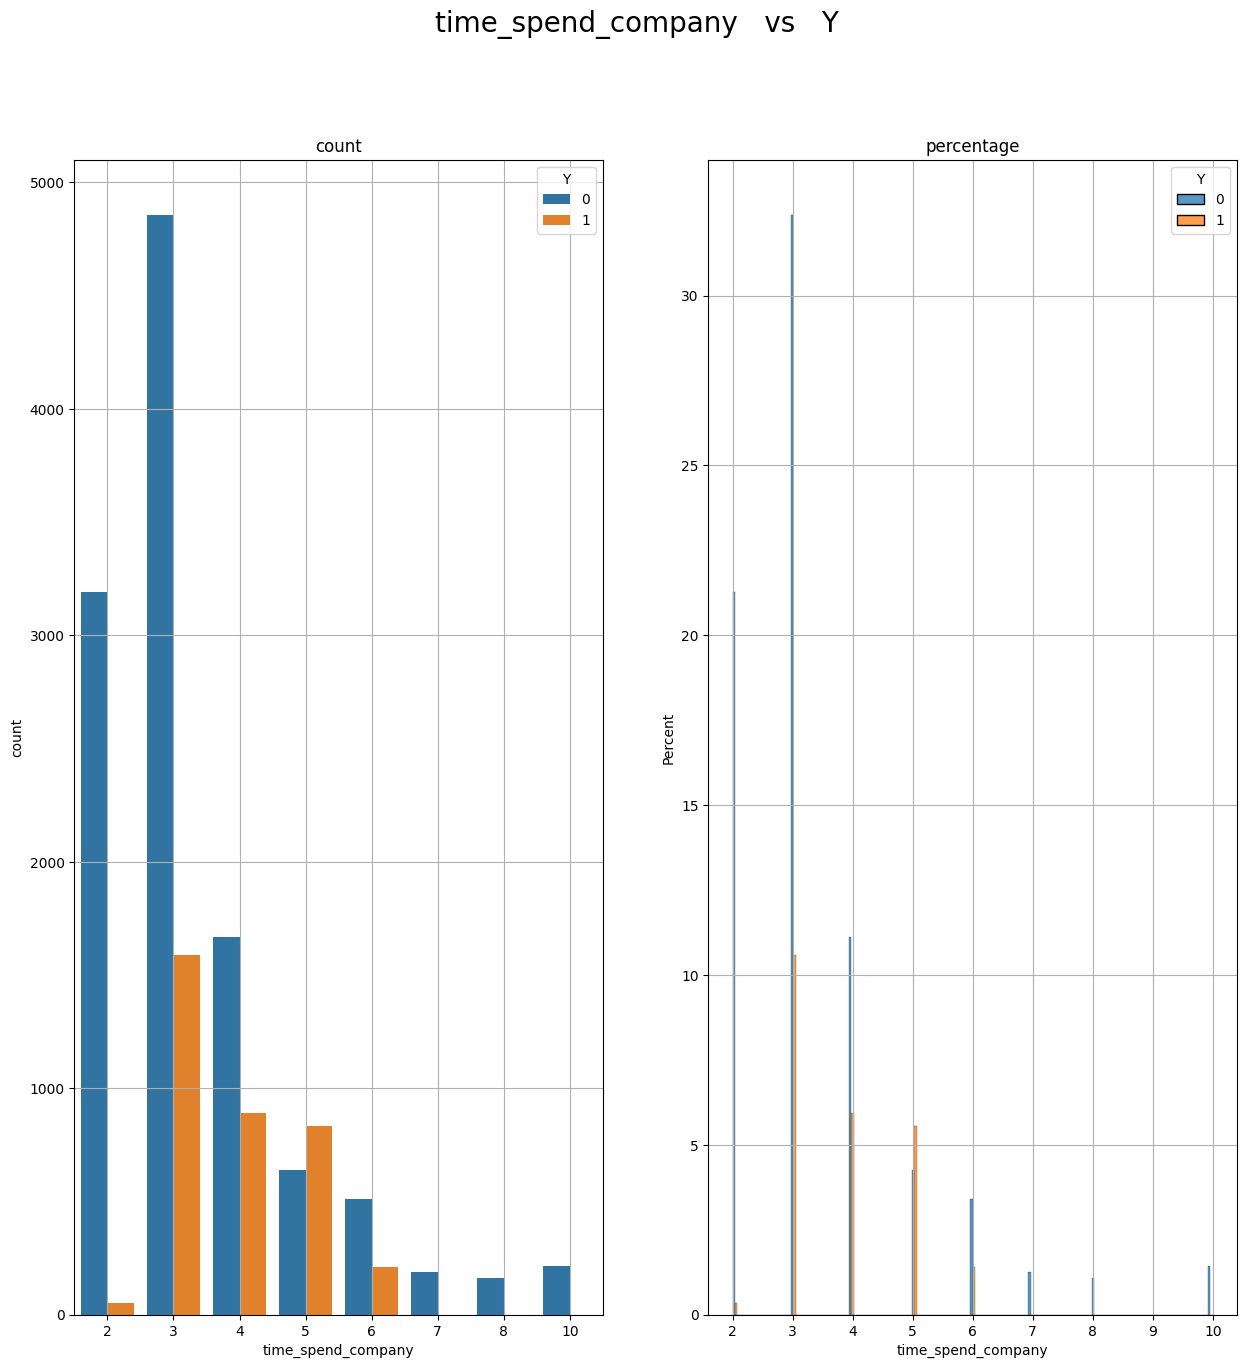

In [127]:
#Analysing highest corr with Y - time_spend_company
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="time_spend_company", y="Y", figsize=(15,15))

## Data Cleaning

__Remove Unwanted Observations__:
- Duplicate observations
- Irrelevant observation

__Fix Structural Errors__:
- Typos and inconsistent capitalization

__Filter Unwanted Outliers__:
- Innocent until proven guilty

__Handle missing data__:
- Catgorical data gets label "Missing!"
- Numerical gets flagged with a dummy variabel and then filled with 0.

In [157]:
#Checking for duplicates
sum(df.duplicated() == True)

#Selecting duplicated rows except first occurence based on all columns
duplicate = df[df.duplicated()]
print(duplicate)

#There are 3008 duplicates, dropping them
df = df.drop_duplicates()
print("New number of observations: ", df.shape[0])

New number of observations:  11991


## Feature Engineering

__Create Intercation Features__:
- Combine two or more features

__Combine Sparse Classes__:
- Sparse classes (in categorical features) are those that have very few total observations.
- Rule of thumb: Combine untl each has at least 50 observations.

__Add Dummy Variables__:
- Create dummy/indicator variables for categorical features.

__Remove Unused Features__:
- Unused in this contex means:
1) ID columns
2) Features that wouldent be available at the time of prediction
3) Other text descriptions

In [169]:
#Counting values in number_project - no one have less than 50 points
df.Departments.value_counts()

#Merging IT and techincal
df.Departments.replace(["technical"],"IT", inplace=True)
df.Departments.value_counts()

sales          3239
IT             3220
support        1821
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Departments, dtype: int64

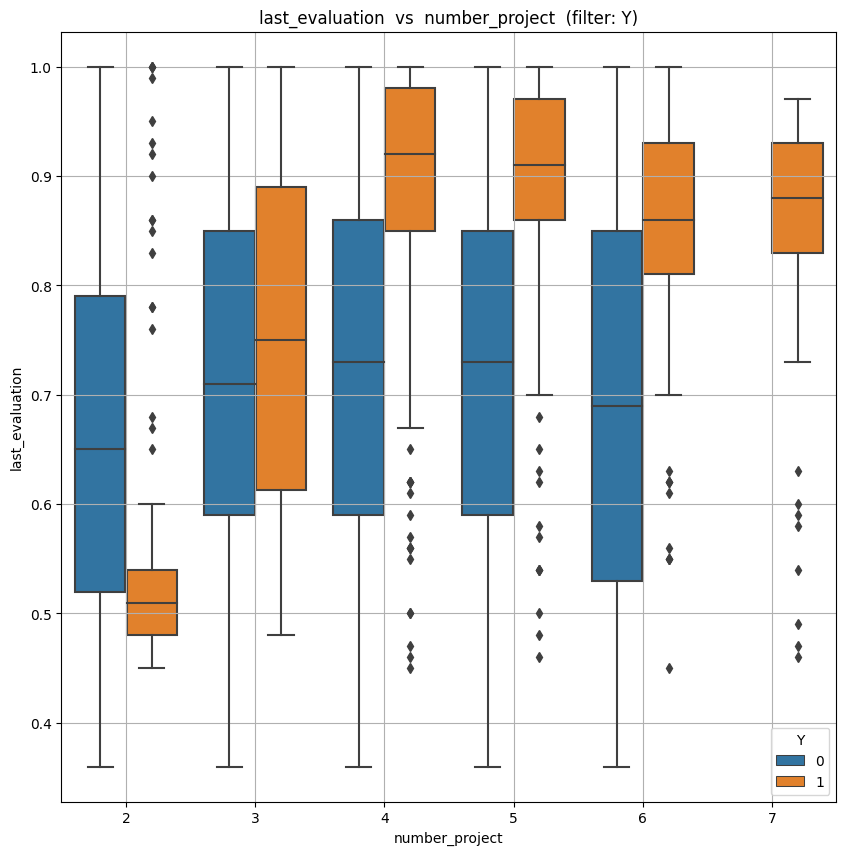

In [178]:
#Looking last_evaluation vs number_project
from functions import cross_distributions
cross_distributions(df, x1="last_evaluation", x2="number_project", y="Y", figsize=(10,10))

In [180]:
#Mergin number_project 2->3, 4->5, 6->7
df.number_project.replace([2],3, inplace=True)
df.number_project.replace([4],5, inplace=True)
df.number_project.replace([6],7, inplace=True)
df.number_project.value_counts()

5    5918
3    5102
7     971
Name: number_project, dtype: int64

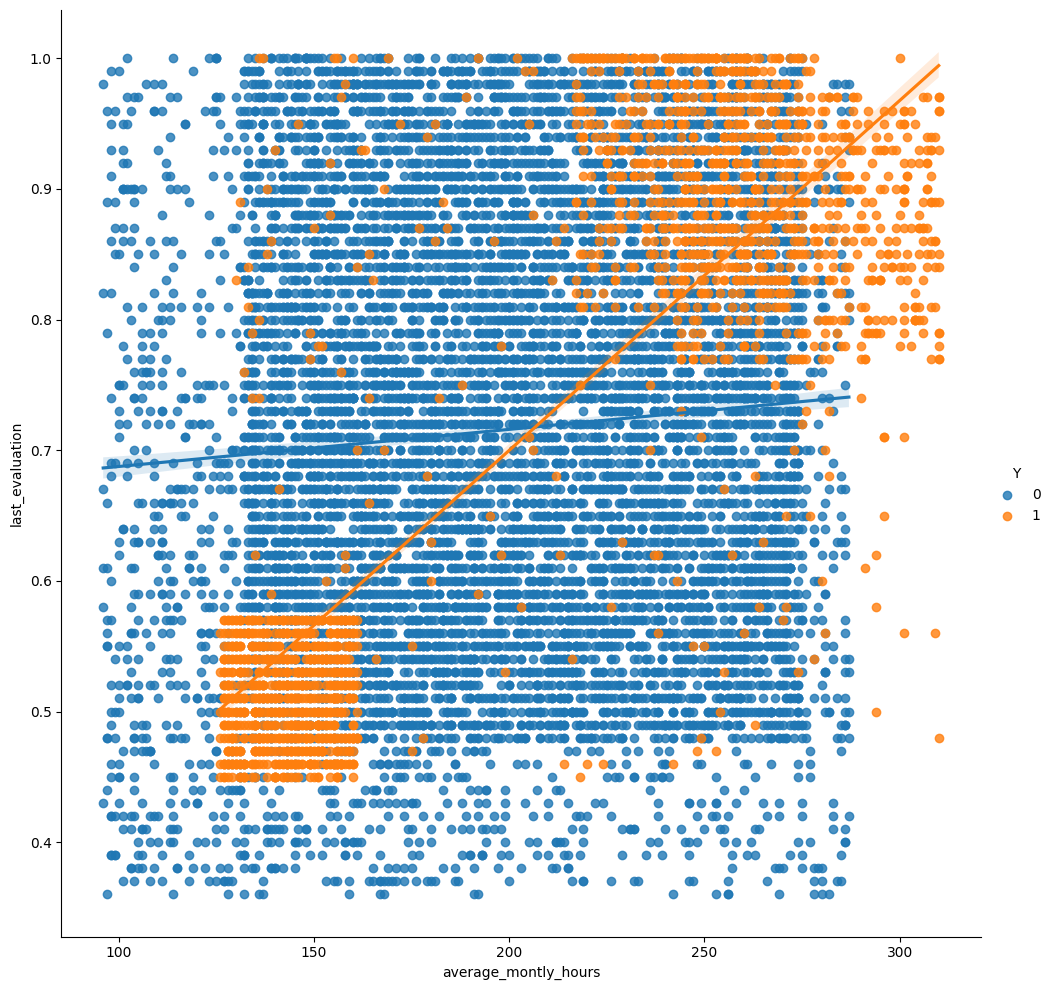

In [176]:
#Check scatterplot of average_montly_hours and last_evaluation"
cross_distributions(df, x1="average_montly_hours", x2="last_evaluation", y="Y", figsize=(10,10))

In [190]:
#Create new variable hard worker
hard_work =[]
for idx,row in df.iterrows():
    if (row["average_montly_hours"]) < 200 and (row['last_evaluation'] < 0.6):
        hard_work.append(1)
    else:
        hard_work.append(0)

hard_work = pd.DataFrame(hard_work)
df["hard_worker"] = hard_work
df = df.drop(columns = ["average_montly_hours","last_evaluation" ])
df

,satisfaction_level,number_project,time_spend_company,Work_accident,Y,promotion_last_5years,Departments,salary,hard_worker
0,0.38,3,3,0,1,0,sales,low,1.0
1,0.80,5,6,0,1,0,sales,medium,0.0
2,0.11,7,4,0,1,0,sales,medium,0.0
3,0.72,5,5,0,1,0,sales,low,0.0
4,0.37,3,3,0,1,0,sales,low,1.0
...,...,...,...,...,...,...,...,...,...
11995,0.90,3,10,1,0,1,management,high,NaN
11996,0.74,5,10,0,0,1,management,high,NaN
11997,0.85,3,10,0,0,1,management,high,NaN
11998,0.33,3,10,0,0,1,marketing,high,NaN


Shape: (11991, 9)
-----------------
satisfaction_level --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
number_project --> Type:cat | Nas: 0(0%) | Categories: 3
time_spend_company --> Type:cat | Nas: 0(0%) | Categories: 8
Work_accident --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:cat | Nas: 0(0%) | Categories: 2
promotion_last_5years --> Type:cat | Nas: 0(0%) | Categories: 2
Departments --> Type:cat | Nas: 0(0%) | Categories: 9
salary --> Type:cat | Nas: 0(0%) | Categories: 3
hard_worker --> Type:cat | Nas: 9(0%) | Categories: 2


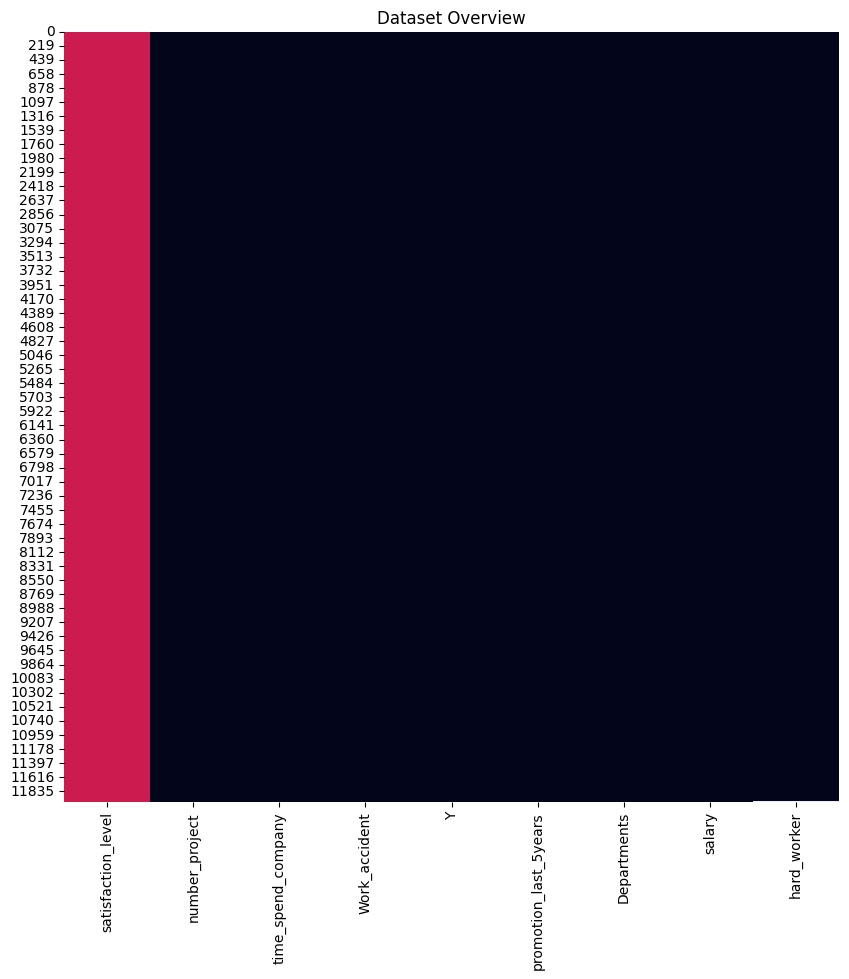

 Categerocial   Numerical/DateTime   NaN 


In [191]:
dtf_overview(df, figsize=(10,10))

In [193]:
#Create dummy variables
df = pd.get_dummies(df, columns = ["number_project","time_spend_company","Work_accident","promotion_last_5years", "Departments", "salary", "hard_worker" ])
df

,satisfaction_level,Y,number_project_3,number_project_5,number_project_7,time_spend_company_2,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,...,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,salary_high,salary_low,salary_medium,hard_worker_0.0,hard_worker_1.0
0,0.38,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
2,0.11,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
3,0.72,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,0.37,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11996,0.74,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11997,0.85,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11998,0.33,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [196]:
#Change name of columns
df = df.rename(columns={'number_project_3': 'under_up_to_3_projects', 'number_project_5' : 'under_up_to_5_projects',"number_project_7" : 'over_5_projects'})
df

,satisfaction_level,Y,under_up_to_3_projects,under_up_to_5_projects,over_5_projects,time_spend_company_2,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,...,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,salary_high,salary_low,salary_medium,hard_worker_0.0,hard_worker_1.0
0,0.38,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
2,0.11,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
3,0.72,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,0.37,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11996,0.74,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11997,0.85,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11998,0.33,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [194]:
for col in df:
    print(col)

satisfaction_level
Y
number_project_3
number_project_5
number_project_7
time_spend_company_2
time_spend_company_3
time_spend_company_4
time_spend_company_5
time_spend_company_6
time_spend_company_7
time_spend_company_8
time_spend_company_10
Work_accident_0
Work_accident_1
promotion_last_5years_0
promotion_last_5years_1
Departments_IT
Departments_RandD
Departments_accounting
Departments_hr
Departments_management
Departments_marketing
Departments_product_mng
Departments_sales
Departments_support
salary_high
salary_low
salary_medium
hard_worker_0.0
hard_worker_1.0
